In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn #dataset을 가져오기 위한 utility module
from sklearn.svm import SVC # 분류작업  
                            # SVC (support vector classifier)를 이용
# decision boundaries가 잘 만들어졌는지 확인
#일반적인 방식으로는 그래프를 그리기가 힘듬
#결정경계를 잘 그릴 수 있는 library를 사용

from mlxtend.plotting import plot_decision_regions

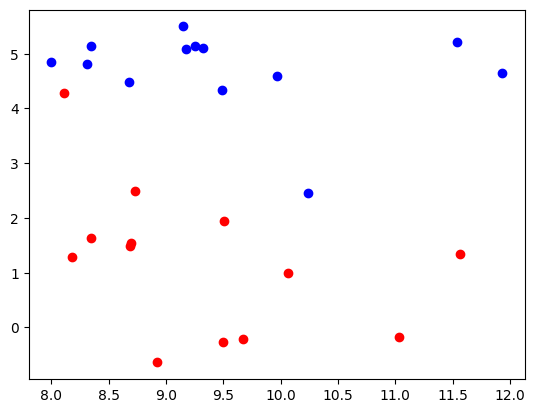

In [3]:
x_data, t_data = mglearn.datasets.make_forge() # 데이터 불러들이기

x_data_red = x_data[t_data == 0]
x_data_blue = x_data[t_data == 1]
plt.scatter(x_data_red[:,0],x_data_red[:,1],c='red')
plt.scatter(x_data_blue[:,0],x_data_blue[:,1],c='blue')
plt.show()

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()
x_data = iris.data[:,0:2]
t_data = iris.target

scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=2
                ) 

model = SVC(kernel='linear',C=0.1)
model.fit(x_data_train_norm, t_data_train)
# 알아낸 supoort vector는 어떤거?
print(model.support_vectors_)
print(model.n_support_)
print(accuracy_score(t_data_test,model.predict(x_data_test_norm)))


[[-1.14301691  0.09821729]
 [-1.26418478  0.09821729]
 [-1.26418478 -0.13197948]
 [-1.50652052  0.09821729]
 [-0.53717756  0.78880759]
 [-1.14301691 -0.13197948]
 [-0.41600969  1.01900435]
 [-0.7795133   1.01900435]
 [-1.02184904  0.32841405]
 [-1.62768839 -1.74335684]
 [-1.02184904 -0.13197948]
 [-0.7795133   0.78880759]
 [-0.90068117  0.78880759]
 [-0.90068117  0.55861082]
 [-0.05250608  2.16998818]
 [-0.29484182 -0.82256978]
 [ 0.91683689 -0.13197948]
 [ 0.06866179  0.32841405]
 [-0.90068117 -1.28296331]
 [ 1.40150837  0.32841405]
 [ 0.18982966 -0.36217625]
 [-0.29484182 -0.13197948]
 [-0.17367395 -1.05276654]
 [ 0.06866179 -0.13197948]
 [-0.17367395 -0.36217625]
 [ 0.18982966 -0.82256978]
 [ 0.31099753 -0.59237301]
 [ 0.79566902 -0.59237301]
 [-0.41600969 -1.28296331]
 [ 0.4321654  -1.97355361]
 [ 0.67450115  0.32841405]
 [ 1.03800476 -0.13197948]
 [ 0.31099753 -0.59237301]
 [-1.02184904 -1.74335684]
 [ 0.55333328  0.55861082]
 [ 0.18982966  0.78880759]
 [-0.29484182 -0.13197948]
 

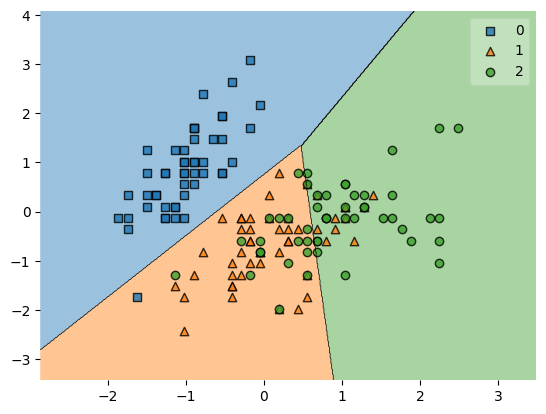

0.8888888888888888


In [6]:

plot_decision_regions(X=x_data_norm,
                      y=t_data,
                      clf=model,
                      legend=1)
plt.show()
print(accuracy_score(t_data_test,model.predict(x_data_test_norm)))

[[-1.81866953  0.08555853]
 [-1.85812246 -2.33741516]
 [ 1.04453138 -1.38298872]
 [ 0.66480037 -0.22592785]
 [ 0.87427365  0.25079339]
 [ 0.73133743  0.59461473]
 [ 0.62456979  0.02492303]
 [ 1.04872805  0.5220518 ]
 [ 1.25650912 -0.07725602]
 [ 1.10178118  0.86297242]
 [ 1.35840512  0.33131168]
 [ 0.92790164  0.03222608]
 [ 1.22509363 -1.6222438 ]
 [ 0.6328582  -0.41638772]
 [ 0.40748306 -1.75440399]
 [-0.11019628 -2.65407282]
 [ 1.24097932  0.61629765]
 [ 0.56210831 -1.76472438]
 [ 1.2341781  -0.93332573]
 [ 0.73768265  0.39657156]
 [-0.0333547  -0.43900321]
 [ 1.06109461 -0.63384324]
 [ 1.26376667 -1.70674538]
 [ 1.44015066 -0.04698759]
 [ 1.02095055  0.06434603]
 [ 1.7007339   1.01392187]
 [ 1.2024733  -0.81131527]
 [ 1.2601151  -1.16226042]
 [ 0.36701769 -1.56150289]
 [ 1.11414774 -0.29292262]
 [ 1.59007732  0.67624481]
 [ 1.15788161 -0.69886986]
 [ 1.4676452  -0.44227159]
 [ 0.96065603 -0.02433167]
 [ 1.33323218 -0.48181122]
 [ 0.97798073 -0.57176432]
 [ 0.92482492  0.0172231 ]
 

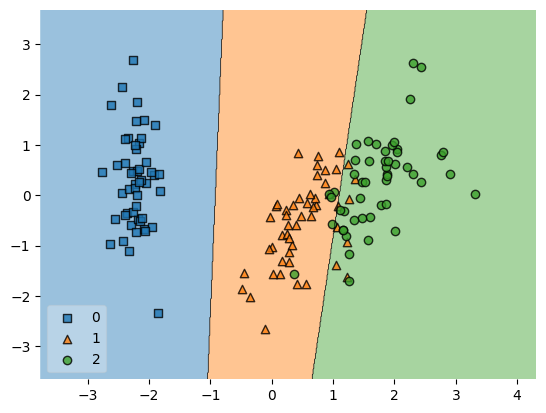

0.9777777777777777


In [7]:
iris = load_iris()
x_data = iris.data
t_data = iris.target

scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 사용해서 차원축소부터 먼저 하죠.
n_components = 2 # 주성분을 2개로 해요!
pca = PCA(n_components = n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)
x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=10
                ) 

model = SVC(kernel='linear',C=0.5)
model.fit(x_data_train_norm_pca, t_data_train)
# 알아낸 supoort vector는 어떤거?
print(model.support_vectors_)
print(model.n_support_)
plot_decision_regions(X=x_data_norm_pca,
                      y=t_data,
                      clf=model,
                      legend=3)
plt.show()
print(accuracy_score(t_data_test,model.predict(x_data_test_norm_pca)))


0.9555555555555556


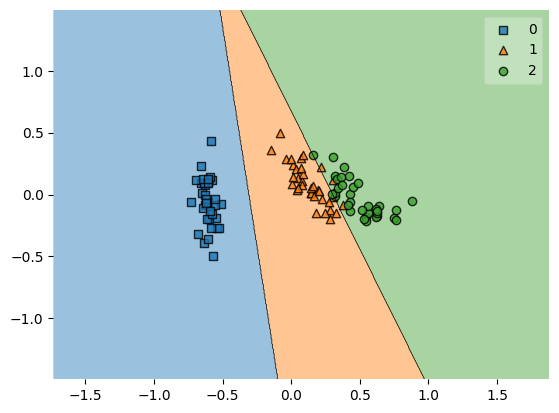

In [8]:
# 주성분분석을 통해서 한번 차원축소된 데이터를 이용해서
# 한번 처리해 보아요!

# PCA를 통해 차원축소된 데이터로 처리하면 결과가 어떻게 될까요?

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치, 이상치, 중복데이터, 정규화 등등의 feature engineering과
# 데이터 전처리가 진행이 되야겠죠.

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
x_data_train_norm_pca = pca.fit_transform(x_data_train_norm)
x_data_test_norm_pca = pca.transform(x_data_test_norm)

# model 생성
model = SVC(kernel='linear',
            C=50)

model.fit(x_data_train_norm_pca,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm_pca))
print(result)   #

plot_decision_regions(X=x_data_train_norm_pca,
                      y=t_data_train,
                      clf=model)

plt.show()

In [9]:
# 마지막으로 SVM으로 모델을 생성해 볼껀데!!
# 사용하는 데이터는 Iris 데이터를 이용.
# feature의 개수는 4개를 다 이용(꽃받침 길이, 너비 그리고 꽃잎의 길이, 너비)
# hyperparamer를 지정해서 모델을 생성해야 하는데 이 작업을 자동화 시킬꺼예요!

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# param_grid를 하나 설정해요!
param_grid = [{
    'kernel': ['linear'],
    'C': [0.1, 0.5, 10, 100]
},{
    'kernel': ['rbf'],
    'C': [0.1, 0.5, 10, 100],
    'gamma': [0.001, 0.01, 0.1]
}]

# Model을 만들어요!
model = SVC()

grid_search = GridSearchCV(model, #튜닝할 모델
                           param_grid, #하이퍼파라미터들의 값을 딕셔너리로 지정
                           cv=5, #교차 검증을 몇겹으로 할지 결정
                           scoring='accuracy', #모델의 성능을 측정할 지표 지정
                           verbose=1) # 실행과정 출력여부

grid_search.fit(x_data_train_norm,
                t_data_train)

# 당연히 가장 좋은 parameter가 어떤 parameter인지 알려줘야지 우리가
# 그걸 가져다가 사용하겠죠.
# 그러면서 해당 parameter를 이용했을때의 정확도도 같이 알려줘요!
print(grid_search.best_params_)
print(grid_search.best_score_)
# {'C': 10, 'kernel': 'linear'}
# 0.9709523809523809

# 가장 parameter를 알아냈으니 이제 모델을 만들면 되겠죠
model = SVC(kernel='linear', #커널 함수 지정, poly, rbf, sigmoid 등이 있음
            C=10) # C값이 클수록 훈련데이터에 더 맞춰지려 함, 낮을수록 오류를 더 허용
 
# 학습하고!
model.fit(x_data_train_norm,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))
# 1.0

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'kernel': 'linear'}
0.9709523809523809
1.0
